In [30]:
import pandas as pd
import numpy as np
import cvxpy as cp

In [31]:
df = pd.read_csv('/Users/hanifemamgholizadeh/Desktop/patter_recognition/data/svm_2d_dataset.csv')
df.head()

,Feature1,Feature2,Label
0,1.728312,-1.257178,0
1,1.198409,-1.880295,0
2,3.048817,3.002258,1
3,1.073579,-1.852979,0
4,1.085900,-1.837457,0


In [32]:
from sklearn.model_selection import train_test_split
X = df.drop('Label', axis=1)
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_train[y_train == 0] = -1  # Convert labels to -1 for SVM
y_test = y_test.to_numpy()
y_test[y_test == 0] = -1  # Convert labels to -1 for SVM

In [34]:
def solve_svm_hard_margin(X_train, y_train):
    n_samples, n_features = X_train.shape

    # Define optimization variables
    w = cp.Variable(n_features)
    b = cp.Variable()

    # Define the constraints: y_i * (w^T x_i + b) >= 1
    constraints = [y_train[i] * (w.T @ X_train[i] + b) >= 1 for i in range(n_samples)]

    # Objective: minimize the Euclidean norm of w (margin maximization)
    objective = cp.Minimize(cp.norm(w, 2))

    # Define and solve the problem
    problem = cp.Problem(objective, constraints)
    problem.solve()

    return w.value, b.value

In [35]:
w, b = solve_svm_hard_margin(X_train, y_train)

In [37]:
preds = np.sign(X_test @ w + b)


In [38]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, preds)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


Weights: [-0.62810075  0.74710484]
Bias: 0.9617394533305291


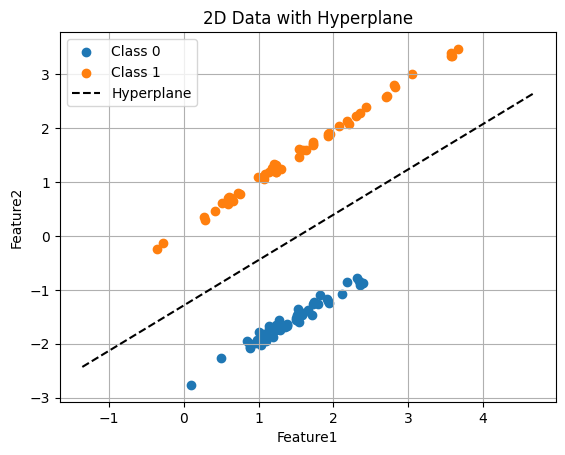

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is called df
# And it has columns: 'feature1', 'feature2', 'label'
feature1 = df.columns[0]  # First feature
feature2 = df.columns[1]  # Second feature

# Extract features and labels
X = df[[feature1, feature2]].values
y = df["Label"].values

# Hyperplane parameters

print("Weights:", w)
print("Bias:", b)
# Range of x1 values for plotting the hyperplane
x1_vals = np.linspace(df[feature1].min() - 1, df[feature1].max() + 1, 100)
# Compute corresponding x2 values using the hyperplane equation
x2_vals = -(w[0]*x1_vals + b) / w[1]

# Plot the data points by label
for label in df['Label'].unique():
    subset = df[df['Label'] == label]
    plt.scatter(subset[feature1], subset[feature2], label=f"Class {label}")

# Plot the hyperplane
plt.plot(x1_vals, x2_vals, 'k--', label='Hyperplane')

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("2D Data with Hyperplane")
plt.legend()
plt.grid(True)
plt.show()